In [10]:
import torch
import torch.nn as nn
import torch.distributed as dist
import torch.optim as optim
from torch.utils.data import DataLoader, DistributedSampler
from torchvision.models import resnet50
from torchvision.datasets import ImageNet
from torchvision import transforms
from torch.nn.parallel import DistributedDataParallel as DDP

from transformers import AutoImageProcessor, ResNetModel
import torch
from datasets import load_dataset

import os
import io

from torch.utils.data import Dataset
from transformers import AutoImageProcessor
from PIL import Image
import torch

class CustomImageDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        
        image = self.hf_dataset[idx]['image']
    
        label = self.hf_dataset[idx]['label']

        print(image)
        if self.transform:
            image = self.transform(image)
        print(image)

        return image, label


from datasets import load_dataset
from transformers import AutoImageProcessor, ResNetModel
import torch

# Load the dataset
dataset = load_dataset("frgfm/imagenette", 'full_size')


# Define your transformations
transform = transforms.Compose([
        transforms.Resize(256),  # Resize so the shortest side is 256 pixels
        transforms.CenterCrop(224),  # Crop the center 224x224 pixels
        transforms.ToTensor(),  # Convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Instantiate the custom dataset
dataset = CustomImageDataset(dataset['validation'], transform=transform)

In [37]:
from models_local import resnet
import torchvision.models as models
from transformers import AutoImageProcessor, ResNetModel

# model = ResNetModel.from_pretrained("microsoft/resnet-50")
# model = model.cuda('cuda')

model = models.resnet50(pretrained=True).to("cuda")

# model = resnet.resnet50(pretrained=True, progress=True, device="cuda").to('cuda')

i = 0
for name, param in model.named_parameters():
    print(name, i)
    i += 1

conv1.weight 0
bn1.weight 1
bn1.bias 2
layer1.0.conv1.weight 3
layer1.0.bn1.weight 4
layer1.0.bn1.bias 5
layer1.0.conv2.weight 6
layer1.0.bn2.weight 7
layer1.0.bn2.bias 8
layer1.0.conv3.weight 9
layer1.0.bn3.weight 10
layer1.0.bn3.bias 11
layer1.0.downsample.0.weight 12
layer1.0.downsample.1.weight 13
layer1.0.downsample.1.bias 14
layer1.1.conv1.weight 15
layer1.1.bn1.weight 16
layer1.1.bn1.bias 17
layer1.1.conv2.weight 18
layer1.1.bn2.weight 19
layer1.1.bn2.bias 20
layer1.1.conv3.weight 21
layer1.1.bn3.weight 22
layer1.1.bn3.bias 23
layer1.2.conv1.weight 24
layer1.2.bn1.weight 25
layer1.2.bn1.bias 26
layer1.2.conv2.weight 27
layer1.2.bn2.weight 28
layer1.2.bn2.bias 29
layer1.2.conv3.weight 30
layer1.2.bn3.weight 31
layer1.2.bn3.bias 32
layer2.0.conv1.weight 33
layer2.0.bn1.weight 34
layer2.0.bn1.bias 35
layer2.0.conv2.weight 36
layer2.0.bn2.weight 37
layer2.0.bn2.bias 38
layer2.0.conv3.weight 39
layer2.0.bn3.weight 40
layer2.0.bn3.bias 41
layer2.0.downsample.0.weight 42
layer2.0.downs

In [39]:
import torch
torch.save(resnet50.state_dict(), "./state_dicts/resnet50_imagenet1k.pt")

In [27]:
layers = [ model.embedder.embedder.convolution, 
          
           model.encoder.stages[0].layers[0].shortcut.convolution,

           model.encoder.stages[0].layers[0].layer[0].convolution,
           model.encoder.stages[0].layers[0].layer[1].convolution,
           model.encoder.stages[0].layers[0].layer[2].convolution,

           model.encoder.stages[0].layers[1].layer[0].convolution,
           model.encoder.stages[0].layers[1].layer[1].convolution,
           model.encoder.stages[0].layers[1].layer[2].convolution,

           model.encoder.stages[0].layers[2].layer[0].convolution,
           model.encoder.stages[0].layers[2].layer[1].convolution,
           model.encoder.stages[0].layers[2].layer[2].convolution,

           model.encoder.stages[1].layers[0].shortcut.convolution,

           model.encoder.stages[1].layers[0].layer[0].convolution,
           model.encoder.stages[1].layers[0].layer[1].convolution,
           model.encoder.stages[1].layers[0].layer[2].convolution,

           model.encoder.stages[1].layers[1].layer[0].convolution,
           model.encoder.stages[1].layers[1].layer[1].convolution,
           model.encoder.stages[1].layers[1].layer[2].convolution,

           model.encoder.stages[1].layers[2].layer[0].convolution,
           model.encoder.stages[1].layers[2].layer[1].convolution,
           model.encoder.stages[1].layers[2].layer[2].convolution,

           model.encoder.stages[2].layers[0].shortcut.convolution,

           model.encoder.stages[2].layers[0].layer[0].convolution,
           model.encoder.stages[2].layers[0].layer[1].convolution,
           model.encoder.stages[2].layers[0].layer[2].convolution,

           model.encoder.stages[2].layers[1].layer[0].convolution,
           model.encoder.stages[2].layers[1].layer[1].convolution,
           model.encoder.stages[2].layers[1].layer[2].convolution,

           model.encoder.stages[2].layers[2].layer[0].convolution,
           model.encoder.stages[2].layers[2].layer[1].convolution,
           model.encoder.stages[2].layers[2].layer[2].convolution,

           model.encoder.stages[2].layers[3].layer[0].convolution,
           model.encoder.stages[2].layers[3].layer[1].convolution,
           model.encoder.stages[2].layers[3].layer[2].convolution,

           model.encoder.stages[2].layers[4].layer[0].convolution,
           model.encoder.stages[2].layers[4].layer[1].convolution,
           model.encoder.stages[2].layers[4].layer[2].convolution,

           model.encoder.stages[2].layers[5].layer[0].convolution,
           model.encoder.stages[2].layers[5].layer[1].convolution,
           model.encoder.stages[2].layers[5].layer[2].convolution,

           model.encoder.stages[3].layers[0].shortcut.convolution,

           model.encoder.stages[3].layers[0].layer[0].convolution,
           model.encoder.stages[3].layers[0].layer[1].convolution,
           model.encoder.stages[3].layers[0].layer[2].convolution,

           model.encoder.stages[3].layers[1].layer[0].convolution,
           model.encoder.stages[3].layers[1].layer[1].convolution,
           model.encoder.stages[3].layers[1].layer[2].convolution,

           model.encoder.stages[3].layers[2].layer[0].convolution,
           model.encoder.stages[3].layers[2].layer[1].convolution,
           model.encoder.stages[3].layers[2].layer[2].convolution  ]

In [31]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [25]:
i = 0
for name, param in model.named_parameters():
    print(name, i)
    i += 1


embedder.embedder.convolution.weight 0
embedder.embedder.normalization.weight 1
embedder.embedder.normalization.bias 2
encoder.stages.0.layers.0.shortcut.convolution.weight 3
encoder.stages.0.layers.0.shortcut.normalization.weight 4
encoder.stages.0.layers.0.shortcut.normalization.bias 5
encoder.stages.0.layers.0.layer.0.convolution.weight 6
encoder.stages.0.layers.0.layer.0.normalization.weight 7
encoder.stages.0.layers.0.layer.0.normalization.bias 8
encoder.stages.0.layers.0.layer.1.convolution.weight 9
encoder.stages.0.layers.0.layer.1.normalization.weight 10
encoder.stages.0.layers.0.layer.1.normalization.bias 11
encoder.stages.0.layers.0.layer.2.convolution.weight 12
encoder.stages.0.layers.0.layer.2.normalization.weight 13
encoder.stages.0.layers.0.layer.2.normalization.bias 14
encoder.stages.0.layers.1.layer.0.convolution.weight 15
encoder.stages.0.layers.1.layer.0.normalization.weight 16
encoder.stages.0.layers.1.layer.0.normalization.bias 17
encoder.stages.0.layers.1.layer.1.c

In [1]:
from datasets import get_dataset_config_names

config_names = get_dataset_config_names("imagenet-1k")
print(config_names)

/home/mheuillet/Desktop/robust_training/.venv/lib/python3.8/site-packages/datasets/load.py:1486: FutureWarning: The repository for imagenet-1k contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/imagenet-1k
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


['default']


In [11]:
dataloader = DataLoader(dataset, batch_size=10, )

In [13]:
for inputs, _ in dataloader:
    pass

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x487 at 0x7F502B6C8B20>
tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

        [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [2]:
from datasets import load_dataset
from transformers import AutoImageProcessor, ResNetModel
import torch

# Load the dataset
dataset = load_dataset("frgfm/imagenette", 'full_size')

# Load the image processor
# image_processor = AutoImageProcessor.from_pretrained("./resnet-50", local_files_only=True)

# # Function to apply preprocessing
# def preprocess_images(examples):
#     # Process images and convert them to tensors
#     examples['pixel_values'] = [ image_processor(images=image).pixel_values for image in examples['image']]
#     return examples

# # Apply preprocessing to all images in the dataset
# dataset = dataset.map(preprocess_images, batched=True, remove_columns=['image'])

# # Example of how to access a preprocessed batch
# batch = dataset['train'][:10]
# inputs = torch.stack(batch['pixel_values'])  # Stack to create a batch tensor



In [28]:
from torchvision import transforms

# Define the PyTorch transform pipeline
transform = transforms.Compose([
    transforms.Resize(256),  # Resize such that the shortest side is 256 pixels
    transforms.CenterCrop(224),  # Crop the image at the center to 224x224
    transforms.ToTensor(),  # Convert image to a tensor
    transforms.ConvertImageDtype(torch.float),  # Ensure the tensor is of type float
    transforms.Lambda(lambda x: x * 0.00392156862745098),  # Rescale the pixel values
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the image
])

# Now, you can apply this transform to your dataset
# For example, using torchvision datasets
from torchvision.datasets import ImageFolder

dataset = load_dataset("frgfm/imagenette", 'full_size')

datasets.ImageFolder(root='/path/to/train', transform=train_transform)

# Assuming your images are in a folder called 'data'
# dataset = ImageFolder(root='data', transform=transform)

FileNotFoundError: Found no valid file for the classes MNIST, cifar-10-batches-py. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

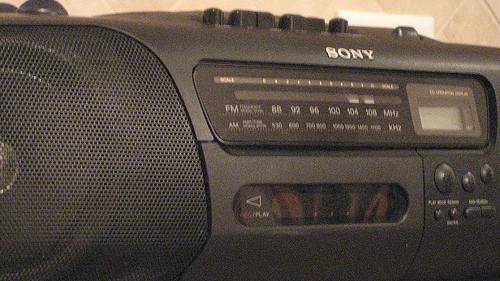

In [5]:
dataset['train'][0]['image']

In [19]:
from transformers import AutoImageProcessor

print('initialize image processor')




initialize image processor


In [24]:
image_processor( dataset['train'][0]['image'] )['pixel_values'][0].shape

(3, 224, 224)

In [25]:
dataset['train'][0]['label'] 

2

In [16]:
import torch
import torch.nn as nn
import torch.distributed as dist
import torch.optim as optim
from torch.utils.data import DataLoader, DistributedSampler
from torchvision.models import resnet50
from torchvision.datasets import ImageNet
from torchvision import transforms
from torch.nn.parallel import DistributedDataParallel as DDP

from transformers import AutoImageProcessor, ResNetModel
import torch
from datasets import load_dataset

import os
import io

from torch.utils.data import Dataset
from transformers import AutoImageProcessor
from PIL import Image
import torch

class CustomImageDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        # Get the image and label from the Hugging Face dataset
        item = self.hf_dataset[idx]
        image = item['image']
        # print(image.shape)
        # Check if the image needs to be opened from a bytes-like object
        # if not isinstance(image, Image.Image):
        #     image = Image.open(io.BytesIO(image)).convert("RGB")

        # print(image.shape)
        # Apply the transformation
        # if self.transform:
        image = self.transform(images=image)['pixel_values'][0]

        # Labels can be handled here if needed
        label = item.get('label', torch.tensor(-1))  # Dummy label handling

        return image, label

print('load dataset')
# dataset = load_dataset("imagenet-1k", cache_dir='/home/mheuill/scratch')
test_dataset = dataset['train']  # Select the test split

print('initialize image processor')
image_processor = AutoImageProcessor.from_pretrained("./resnet-50", local_files_only=True)



load dataset
initialize image processor


In [17]:
print('create custom dataset')
custom_dataset = CustomImageDataset(test_dataset, transform=image_processor)


create custom dataset


In [18]:


print('load dataloader')
dataloader = DataLoader(custom_dataset, batch_size=1024,  num_workers=4)

load dataloader


In [3]:
# dataset = load_dataset("imagenet-1k")
# image = dataset["test"]["image"][0]

from transformers import AutoImageProcessor
image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")

image_processor.save_pretrained("./resnet-50")
# inputs = image_processor(image, return_tensors="pt")

# model = ResNetModel.from_pretrained("microsoft/resnet-50")



# with torch.no_grad():
#     outputs = model(**inputs)

# last_hidden_states = outputs.last_hidden_state
# list(last_hidden_states.shape)

['./resnet-50/preprocessor_config.json']

In [2]:
image_processor

ConvNextImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "crop_pct",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

In [14]:
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])